In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")

Out[201]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_committed_6430546272860639810', name='_committed_6430546272860639810', size=4681232, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_started_6430546272860639810', name='_started_6430546272860639810', size=0, modificationTime=1666559125000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', name='part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', size=18145455, modificationTime=1666557337000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.n

# Exploring reddit data using Spark

## Data Overview
Let us begin with listing the file in the bucket. There are two folders `comments` and `submissions`, we will read both of them into separate Spark dataframes. The raw data is in [parquet format](https://www.databricks.com/glossary/what-is-parquet#:~:text=What%20is%20Parquet%3F,handle%20complex%20data%20in%20bulk.).  

This dataset is composed of the content of Submissions and Comments from Reddit from January 2021 to September 2022, as well as important metrics. These metrics include author, date, disputed, rewarded, collapsed, etc. The Submissions table has 643,255,528 rows and 68 columns, and the Comments table has 4,473,556,762 rows and 21 columns.

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet")

Out[10]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/', name='comments/', size=0, modificationTime=1666557328000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions/', name='submissions/', size=0, modificationTime=1666559745000)]

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

A glimpse of the data and the schema.

In [0]:
comments.show()

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

In [0]:
submissions.show()

+------------------+------------------+--------+-----------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+------------+--------------------+--------+-----------+---------------------+------------+------------+-----+--------------------+--------------------+--------------------+-------+--------+------------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+---

## Research Avenues

### Avenue 1 
**Business goal**: As for answering questions, would a controversial post receive more attention and support? Explore the posts for the subreddit called “AskReddit” to see if posts with controversiality are more likely to be gilded. <br>
**Technical proposal**: Check the distribution of controversial posts in the subreddit in comparison to other popular subreddits; Use NLP to analyze the sentiment of posts in the subreddit and compare the distribution with that of controversiality; finally, build a machine learning model to predict whether a post is gilded or not, thus exploring the critical factors(if any).

### Avenue 2 
**Business goal**: Determine if Reddit users tend to be less active in average when they are browsing a larger subreddit, since sense of self-presence is closely related to activity and is potentially weaker in bigger forums due to presence of too many people. <br>
**Technical proposal**: Group the posts by subreddits to get the count of posts for each subreddit and by author in each of the subreddits to get the total number of active users in each subreddit. Use ML techniques to formulate a model between total posts and average number of posts for each user, thus determining whether a bigger subreddit would actually suppress an individual's willingness to make a post.

### Avenue 3 

**Business goal**: Explore the pattern of most active users. Are they posting more controversial or negative content in order to grab attention from others? <br>
**Technical proposal**: Group the posts by their authors to get the 1000 most active users in reddit, then check the distribution of controversiality compared to the overall level and to determine if they are producing more controversial content. Then, use NLP on their posts to determine if they are producing negative content to grab the eyes.

### Avenue 4 
**Business goal**: What kind of accounts does Reddit tend to cancel? Negative/controversial content could naturally lead to unhealthy atmosphere, so is it also a critical factor that contributes to the deletion of a reddit account? <br>
**Technical proposal**: Filter the posts whose author name is “[deleted]” to get the posts whose author’s account has been deleted, then check the ratio of posts with controversiality to see if controversial posts are potentially contributing to the deletion of accounts. Next, use NLP to determine the overall sentiment of those posts to see if deleted accounts generally post more negative content. Finally, build a ML model to see if we could predict the posts to have a deleted user or not, without actually analyzing its content.

### Avenue 5 
**Business goal**: Could Reddit posts in financial fields reflect the actual market state? Explore the potential correlation between US stock price and Reddit mood in the subreddit “wallstreetbets”, a business and financial topic. <br>
**Technical proposal**: Figure out the timescale of the submission dataset, fetch the external data of US stock price trends in that period, and merge them into the dataframe. Then, use NLP to analyze the sentiment behind posts in that subreddit and aggregate in an appropriate scale to fit with the time unit of stock prices. Finally, by building an ML model,  the potential correlation between Reddit mood and the stock market could be revealed a bit, if any.

### Avenue 6 
**Business goal**: If the Reddit company decides to bring more attention to subreddit “AutoNewspaper”, then explore which type of news is more welcomed by the reddit user.
 <br>
**Technical proposal**: The favorable of the news can be reflected by the number of likes and dislikes, also by the amount of gild received.  In this project, the scores column in the submission dataset computes the difference between the number of likes and the number of dislikes. Thus, the News topic with a higher score and gild level is considered to be more attractive for users. So NLP could be used to categorize news into topics and to compare the scores for each News topic posted in the subreddit “AutoNewspaper”. Then find which news topics have the highest scores in the dataset. Also, present the score with the news topics along with their average gild level.

### Avenue 7
**Business goal**: If the Reddit company is considering holding an interactive event, then when and how should they host that event so the reddit user participation rate could be at most? <br>
**Technical proposal**: In this project, the time series data record the number of participants active on reddit in both the week and day format. Then, aggregate the data into the 7 days in a week to see which day in a week would gather the most attention from the users. Also, use NLP to make a comparison between stickied and non-stickled posts regarding their average score and sentiment to see if the interactive event should be stickied or not to receive more likes from the users.

### Avenue 8
**Business goal**: If the Reddit company decides to include more news in the subreddit “AutoNewspaper”, then which news source should they be focused on based on the steadiness of making new posts, for various types of news? <br>
**Technical proposal**: Use NLP to identify the news source and type for each News posted in the subreddit “AutoNewspaper”. Then, count which news sources are mentioned the most in the dataset for each of the formulated types of news. Addtionally, the 3 most mentioned type of news for each of the news sources could be presented to help the Reddit company to decide for future cooperations.

### Avenue 9
**Business goal**: Which of the 2 groups, adults and teenagers, consists of a more important part in the Reddit society? <br>
**Technical proposal**: The age of post authors could be identified by the variable "over_18", thus a groupby operation could be used to separate posts made by adults and by teenagers. Then, comparisons on various statistics, such as total number of posts, most popular topics, average score and gild level, etc. The techniques of Natural Language Processing could be further applied to see if teenagers in the era of covid have been expressing more struggles than the adults. Through out of these comparisons, a general understanding of teenagers' role in the Reddit society could be revealed a bit.

### Avenue 10 
**Business goal**: Video posts have been thriving as a new type of reddit posts. What are their target users and how well do they perform in the aspect of score and awards? <br>
**Technical proposal**: Filter out the video posts from the dataset by the variable "is_video" present in the submission dataset, then make comparisons between distributions of adult user ratio, score and gild level for video posts and regular posts. This could give us an idea on the target user of video posts and their overall performance comparing to other posts. Additionally, NLP may be used to reveal commentors' tastes on the video and let us see the subreddits where video posts are welcomed/hated the most.

## Exploratory Data Analysis

Here is an example of some EDA. But, before we do that let us setup some local directory structure so that that the results can be checked in into the repo.

In [0]:
## create a directory called data/plots and data/csv to save generated data
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

### Basic Info
- Number of Row and Column
- Schema Check
- Column Data Types

In [0]:
submissions_row_count = submissions.count()
submission_col_count = len(submissions.columns)
comments_row_count = comments.count()
comment_col_count = len(comments.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submission_col_count}")
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

shape of the submissions dataframe is 643,255,528x68
shape of the comments dataframe is 4,473,556,762x21


In [0]:
submissions.printSchema() 

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
comments.printSchema() 

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
# column name 
print('submissions column:',submissions.columns)
print('submissions column:',comments.columns)

submissions column: ['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author', 'author_cakeday', 'author_flair_css_class', 'author_flair_text', 'author_id', 'brand_safe', 'contest_mode', 'created_utc', 'crosspost_parent', 'crosspost_parent_list', 'disable_comments', 'distinguished', 'domain', 'domain_override', 'edited', 'embed_type', 'embed_url', 'gilded', 'hidden', 'hide_score', 'href_url', 'id', 'imp_pixel', 'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_css_class', 'link_flair_text', 'locked', 'media', 'media_embed', 'mobile_ad_url', 'num_comments', 'num_crossposts', 'original_link', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'post_hint', 'preview', 'promoted', 'promoted_by', 'promoted_display_name', 'promoted_url', 'retrieved_on', 'score', 'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'suggested_sort', 'third_party_trackers', 'third_party_tracking', 'third_party_trac

### Data Quality Checks
- Missing value
- Length of the comments
- Remove rows of data that might be corrupted

In [0]:
from pyspark.sql.functions import *

In [0]:
# turn boolean value to 0/1 
# author_cakeday, can_gild, is_submitter, stickied
dfc=comments.withColumn('author_cakeday',when(comments.author_cakeday == False,0)
                  .when(comments.author_cakeday == True,1))\
.withColumn('can_gild',when(comments.can_gild == False,0)
                  .when(comments.can_gild == True,1))\
.withColumn('is_submitter',when(comments.is_submitter == False,0)
                  .when(comments.is_submitter == True,1))\
.withColumn('stickied',when(comments.stickied == False,0)
                  .when(comments.stickied == True,1))

In [0]:
comments_Columns= comments.columns
dfc.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull()| \
                            isnan(c), c 
                           )).alias(c) for c in comments_Columns]).show()

+------+--------------+----------------------+-----------------+-------+--------+----------------+-----------+-------------+------+------+---+------------+-------+---------+---------+------------+-----+--------+---------+------------+
|author|author_cakeday|author_flair_css_class|author_flair_text|   body|can_gild|controversiality|created_utc|distinguished|edited|gilded| id|is_submitter|link_id|parent_id|permalink|retrieved_on|score|stickied|subreddit|subreddit_id|
+------+--------------+----------------------+-----------------+-------+--------+----------------+-----------+-------------+------+------+---+------------+-------+---------+---------+------------+-----+--------+---------+------------+
|244538|    4458532168|            4085522614|       3658952958|4281381|       0|               0|          0|   4318028560|     0|     0|  0|           0|      0|        0|     9298|  1031220301|    0|       0|     9299|           0|
+------+--------------+----------------------+--------------

In [0]:
# turn boolean value to 0/1 
#archived,author_cakeday,brand_safe,contest_mode,disable_comments,hidden,hide_score,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,over_18,pinned,promoted,spoiler,stickied
dfs=submissions.withColumn('archived',when(submissions.archived == False,0)
                  .when(submissions.archived == True,1))\
.withColumn('author_cakeday',when(submissions.author_cakeday == False,0)
                  .when(submissions.author_cakeday == True,1))\
.withColumn('brand_safe',when(submissions.brand_safe == False,0)
                  .when(submissions.brand_safe == True,1))\
.withColumn('contest_mode',when(submissions.contest_mode == False,0)
                  .when(submissions.contest_mode == True,1))\
.withColumn('disable_comments',when(submissions.disable_comments == False,0)
                  .when(submissions.disable_comments == True,1))\
.withColumn('hidden',when(submissions.hidden == False,0)
                  .when(submissions.hidden == True,1))\
.withColumn('hide_score',when(submissions.hide_score == False,0)
                  .when(submissions.hide_score == True,1))\
.withColumn('is_crosspostable',when(submissions.is_crosspostable == False,0)
                  .when(submissions.is_crosspostable == True,1))\
.withColumn('is_reddit_media_domain',when(submissions.is_reddit_media_domain == False,0)
                  .when(submissions.is_reddit_media_domain == True,1))\
.withColumn('is_self',when(submissions.is_self == False,0)
                  .when(submissions.is_self == True,1))\
.withColumn('is_video',when(submissions.is_video == False,0)
                  .when(submissions.is_video == True,1))\
.withColumn('locked',when(submissions.locked == False,0)
                  .when(submissions.locked == True,1))\
.withColumn('over_18',when(submissions.over_18 == False,0)
                  .when(submissions.over_18 == True,1))\
.withColumn('pinned',when(submissions.pinned == False,0)
                  .when(submissions.pinned == True,1))\
.withColumn('promoted',when(submissions.promoted == False,0)
                  .when(submissions.promoted == True,1))\
.withColumn('spoiler',when(submissions.spoiler == False,0)
                  .when(submissions.spoiler == True,1))\
.withColumn('stickied',when(submissions.stickied == False,0)
                  .when(submissions.stickied == True,1))


In [0]:
submissions_Columns= ['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author', 'author_cakeday', 'author_flair_css_class', 'author_flair_text', 'author_id', 'brand_safe', 'contest_mode', 'created_utc', 'crosspost_parent', 'disable_comments', 'distinguished', 'domain', 'domain_override', 'edited', 'embed_type', 'embed_url', 'gilded', 'hidden', 'hide_score', 'href_url', 'id', 'imp_pixel', 'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_css_class', 'link_flair_text', 'locked', 'mobile_ad_url', 'num_comments', 'num_crossposts', 'original_link', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'post_hint', 'promoted', 'promoted_by', 'promoted_display_name', 'promoted_url', 'retrieved_on', 'score', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'suggested_sort', 'third_party_tracking', 'third_party_tracking_2', 'thumbnail', 'thumbnail_height', 'thumbnail_width', 'title', 'url', 'whitelist_status']
dfs.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull()| \
                            isnan(c), c 
                           )).alias(c) for c in submissions_Columns]).show()

+------------------+------------------+--------+------+--------------+----------------------+-----------------+---------+----------+------------+-----------+----------------+----------------+-------------+-------+---------------+------+----------+---------+------+------+----------+---------+---+---------+----------------+----------------------+-------+--------+--------------------+---------------+------+-------------+------------+--------------+-------------+-------+-----------------------+---------+------+---------+---------+-----------+---------------------+------------+------------+-----+---------+-------+--------+---------+------------+--------------+--------------------+----------------------+---------+----------------+---------------+-----+-------+----------------+
|adserver_click_url|adserver_imp_pixel|archived|author|author_cakeday|author_flair_css_class|author_flair_text|author_id|brand_safe|contest_mode|created_utc|crosspost_parent|disable_comments|distinguished| domain|domai

In [0]:
# drop columns with too much missing value
dfc=dfc.drop('author_cakeday','author_flair_css_class','author_flair_text','distinguished','retrieved_on').cache()
dfs=dfs.drop('adserver_click_url','adserver_imp_pixel','author_cakeday','author_flair_css_class','author_flair_text','author_id','brand_safe','crosspost_parent','disable_comments','distinguished','domain_override','embed_type','embed_url','href_url','imp_pixel','link_flair_css_class','link_flair_text','mobile_ad_url','original_link','parent_whitelist_status','post_hint','promoted','promoted_by','promoted_display_name','promoted_url','retrieved_on','selftext','suggested_sort','third_party_tracking','third_party_tracking_2','thumbnail_height','thumbnail_width','whitelist_status').cache()

In [0]:
dfc.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: integer (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: integer (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: integer (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
dfs.printSchema()

root
 |-- archived: integer (nullable = true)
 |-- author: string (nullable = true)
 |-- contest_mode: integer (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- banned_at_utc: string (nullable = true)
 |    |    |-- banned_by: string (nullable = true)
 |    |    |-- brand_safe: boolean (nullable = true)
 |    |    |-- can_gild: boolean (nullable = true)
 |    |    |-- can_mod_post: boolean (nullable = true)
 |    |    |-- clicked: boolean (nullable = true)
 |    |    |-- contest_mode: boolean (nullable = true)
 |    |    |-- created: doub

In [0]:
# dimension of the data after clean
submissions_row_count = dfs.count()
submission_col_count = len(dfs.columns)
comments_row_count = dfc.count()
comment_col_count = len(dfc.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submission_col_count}")
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

shape of the submissions dataframe is 643,255,528x35
shape of the comments dataframe is 4,473,556,762x16


In [0]:
# save to DBFS
dfc.write.mode('Overwrite').parquet('dbfs:/FileStore/comments_clean.parquet')
dfs.write.mode('Overwrite').parquet('dbfs:/FileStore/submissions_clean.parquet')

### Create New Variables 
- date variable: generate the date format like '2011-0-01'
- month variable: generate the month of the date
- hour variable: generate the hour of when comment or submission is publishes.
- day of week variable: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday(1 for Sunday, 2 for Monday,...,7 for Saturday)
- account_deleted variable: Where the author account has been deleted.

In [0]:
dfs = spark.read.parquet("dbfs:/FileStore/submissions_clean.parquet")
dfc = spark.read.parquet("dbfs:/FileStore/comments_clean.parquet")

In [0]:
# generate new variables
# generate date column month column, the day of the week column and whether the author account is deleted or not
dfc =dfc.withColumn('date', to_date(col('created_utc').cast('timestamp'),"yyyy-MM-dd HH:mm:ss")) \
.withColumn('day_of_week', dayofweek(from_unixtime(col('created_utc')))) \
.withColumn('month',month(from_unixtime(col('created_utc')))) \
.withColumn('hour', hour(from_unixtime(col('created_utc')))) \
.withColumn('account_deleted', when(col('author') == '[deleted]',1).otherwise(0))

In [0]:
dfc.show(5)

+-----------------+--------------------+--------+----------------+-----------+------+------+-------+------------+---------+----------+--------------------+-----+--------+--------------------+------------+----------+-----------+-----+----+---------------+
|           author|                body|can_gild|controversiality|created_utc|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|score|stickied|           subreddit|subreddit_id|      date|day_of_week|month|hour|account_deleted|
+-----------------+--------------------+--------+----------------+-----------+------+------+-------+------------+---------+----------+--------------------+-----+--------+--------------------+------------+----------+-----------+-----+----+---------------+
|       FieldOfFox|  Music taste is bad|       1|               0| 1624437152| false|     0|h2qxlzs|           0|t3_o62mtb|t1_h2qvhl6|/r/terriblefacebo...|    1|       0|terriblefacebookm...|    t5_2tja6|2021-06-23|          4|    6|  

In [0]:
dfc.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: integer (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: integer (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: integer (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- account_deleted: integer (nullable = false)



In [0]:
# generate new variables
# generate date column, month column, the day of the week column and the author account is deleted or not
dfs =dfs.withColumn('date', to_date(col('created_utc').cast('timestamp'),"yyyy-MM-dd HH:mm:ss")) \
.withColumn('day_of_week', dayofweek(from_unixtime(col('created_utc')))) \
.withColumn('month',month(from_unixtime(col('created_utc')))) \
.withColumn('hour', hour(from_unixtime(col('created_utc'))))

In [0]:
dfs.show(5)

+--------+----------------+------------+-----------+---------------------+-----------+------+------+------+----------+------+----------------+----------------------+-------+--------+------+--------------------+--------------------+------------+--------------+-------+--------------------+------+--------------------+-----+--------------------+--------------------+-------+--------+----------------+------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+-----+----+
|archived|          author|contest_mode|created_utc|crosspost_parent_list|     domain|edited|gilded|hidden|hide_score|    id|is_crosspostable|is_reddit_media_domain|is_self|is_video|locked|               media|         media_embed|num_comments|num_crossposts|over_18|           permalink|pinned|             preview|score|        secure_media|  secure_media_embed|spoiler|stickied|       subreddit|subreddit_id|third_party_trackers|           thumbnail|               ti

In [0]:
dfs.printSchema()

root
 |-- archived: integer (nullable = true)
 |-- author: string (nullable = true)
 |-- contest_mode: integer (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- banned_at_utc: string (nullable = true)
 |    |    |-- banned_by: string (nullable = true)
 |    |    |-- brand_safe: boolean (nullable = true)
 |    |    |-- can_gild: boolean (nullable = true)
 |    |    |-- can_mod_post: boolean (nullable = true)
 |    |    |-- clicked: boolean (nullable = true)
 |    |    |-- contest_mode: boolean (nullable = true)
 |    |    |-- created: doub

In [0]:
# save to DBFS
dfs.write.mode('Overwrite').parquet('dbfs:/FileStore/submissions_new_column.parquet')
dfc.write.mode('Overwrite').parquet('dbfs:/FileStore/comments_new_column.parquet')

### Explore the top 20 most popular by submission and comment count

#### Data Perperation for Plot

In [0]:
submissions_by_subreddit = dfs.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()
comments_by_subreddit = dfc.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()

In [0]:
top_n = 20
top_n_subreddits_sub = spark.createDataFrame(submissions_by_subreddit[:top_n]).toPandas()
top_n_subreddits_com = spark.createDataFrame(comments_by_subreddit[:top_n]).toPandas()
count_subreddits_sub = spark.createDataFrame(submissions_by_subreddit).toPandas()
count_subreddits_com = spark.createDataFrame(comments_by_subreddit).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, f"top_{top_n}_subreddits_count_by_submissions.csv")
top_n_subreddits_sub.to_csv(fpath)
fpath = os.path.join(CSV_DIR, f"top_{top_n}_subreddits_count_by_comments.csv")
top_n_subreddits_com.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "subreddits_count_by_submissions.csv")
count_subreddits_sub.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "subreddits_count_by_comments.csv")
count_subreddits_com.to_csv(fpath)

#### Plot and Insight

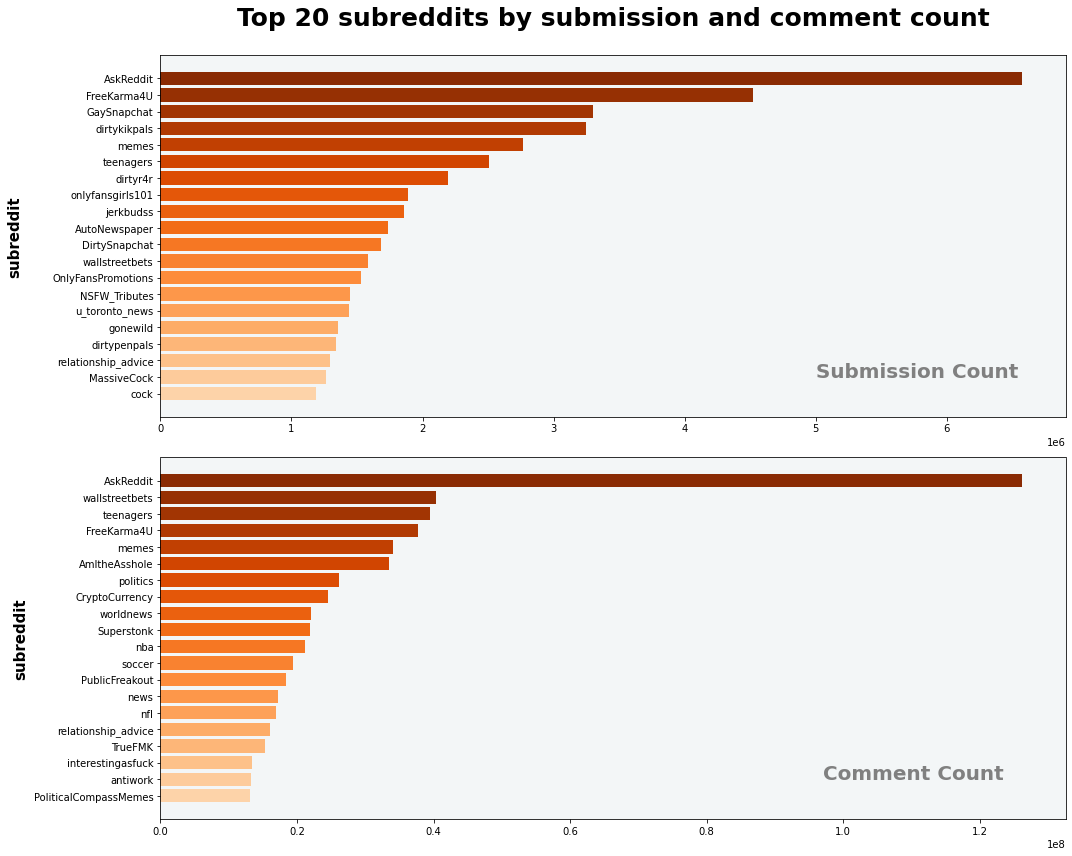

In [0]:
## Import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
plt.subplot(211)
plt.rcParams['figure.figsize'] = [15, 12]
plt.barh(y="subreddit", width= "count", data = top_n_subreddits_sub.sort_values(by='count', ascending=True, inplace=False), color=sns.color_palette('Oranges',25)[5:])
plt.ylabel("subreddit", fontsize = 15,fontweight='bold',labelpad=30)
plt.text(5000000,1,'Submission Count', fontsize = 20, fontweight ='bold',color='gray')
plt.title(f"Top {top_n} subreddits by submission and comment count",fontsize = 25, fontweight='bold',pad=30)

plt.subplot(212)
plt.barh(y="subreddit", width= "count", data = top_n_subreddits_com.sort_values(by='count', ascending=True, inplace=False), color=sns.color_palette('Oranges',25)[5:])
plt.ylabel("subreddit",fontsize = 15,fontweight='bold',labelpad=5)
plt.text(97000000,1,'Comment Count', fontsize = 20, fontweight ='bold',color='gray')
plt.tight_layout()

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, f'top_{top_n}_subreddits_count.png')
plt.savefig(plot_fpath)
plt.show()

This figure displays the top 20 most popular subreddits for submission and comment. <br>
From the figure, we could observe that:<br>
1. There exists a big difference in the topics favored by submission and comment. People tend to make a post for NSFW contents in many different 18+ subreddits while response a post for SFW contents.<br>
2. Topics about News, Sports, investment market are top of the comment count.

### Explore the top 20 subreddits by subbmission count

#### Data Perperation for Plot

In [0]:
# submission over 18 or not
submissions_18 = dfs.filter(col('over_18') == 1).cache()
submissions_not18 = dfs.filter(col('over_18') == 0).cache()
submissions_by_subreddit_18 = submissions_18.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()
submissions_by_subreddit_not18 = submissions_not18.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()
top_n_subreddits_sub_18 = spark.createDataFrame(submissions_by_subreddit_18[:top_n]).toPandas()
top_n_subreddits_sub_not18 = spark.createDataFrame(submissions_by_subreddit_not18[:top_n]).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, f"top_{top_n}_subreddits_count_by_submissions_18.csv")
top_n_subreddits_sub_18.to_csv(fpath)
fpath = os.path.join(CSV_DIR, f"top_{top_n}_subreddits_count_by_submissions_not18.csv")
top_n_subreddits_sub_not18.to_csv(fpath)

In [0]:
# save to DBFS
submissions_18.write.mode('Overwrite').parquet('dbfs:/FileStore/submissions_18.parquet')
submissions_not18.write.mode('Overwrite').parquet('dbfs:/FileStore/submissions_not18.parquet')

#### Plot and Insight

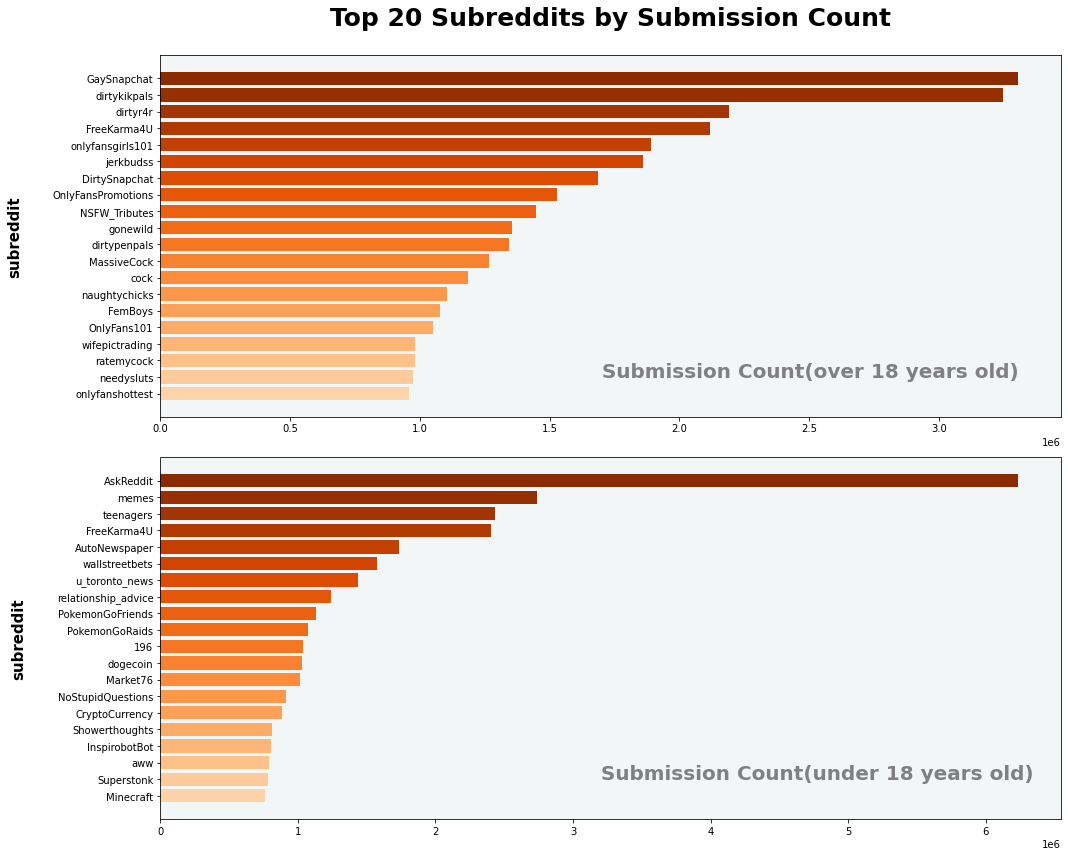

In [0]:
plt.figure()
plt.subplot(211)
plt.rcParams['figure.figsize'] = [15, 12]
plt.barh(y="subreddit", width= "count", data = top_n_subreddits_sub_18.sort_values(by='count', ascending=True, inplace=False), color=sns.color_palette('Oranges',25)[5:])
plt.ylabel("subreddit", fontsize = 15,fontweight='bold',labelpad=30)
plt.text(1700000,1,'Submission Count(over 18 years old)', fontsize = 20, fontweight ='bold',color='gray')
plt.title(f"Top {top_n} Subreddits by Submission Count",fontsize = 25, fontweight='bold',pad=30)

plt.subplot(212)
plt.barh(y="subreddit", width= "count", data = top_n_subreddits_sub_not18.sort_values(by='count', ascending=True, inplace=False), color=sns.color_palette('Oranges',25)[5:])
plt.ylabel("subreddit",fontsize = 15,fontweight='bold',labelpad=30)
plt.text(3200000,1,'Submission Count(under 18 years old)', fontsize = 20, fontweight ='bold',color='gray')
plt.tight_layout()

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, f'top_{top_n}_subreddits_18ornot.png')

plt.savefig(plot_fpath)
plt.show()

This figure displays the top 20 most popular subreddits for teenagers and for adults.<br>
From the figure, we could observe that:<br>
1. There exists a big difference in the topics favored by teenager and adult authors. While teenagers often use Reddit to ask questions and exchange experiences&ideas among various topics, the adult authors seem to focus on posting NSFW contents in many different 18+ subreddits.<br>
2. The question-asking subreddit is mainly used by the teenagers, thus the professional level of the channel seems a bit suspicious. Maybe there are other forums for more professional questions to be asked and to be solved.

### Explore submissions and comments count by different time scale

#### Data Perperation for Plot

In [0]:
import time
time_max = dfc.select("created_utc").rdd.max()[0]
time_min = dfc.select("created_utc").rdd.min()[0]

In [0]:
print('Maximal Time:',time.strftime('%Y-%m-%d %X',time.localtime(time_max)))
print('Minimal Time:',time.strftime('%Y-%m-%d %X',time.localtime(time_min)))

Maximal Time: 2022-08-31 23:59:59
Minimal Time: 2021-01-01 00:00:00


In [0]:
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")

In [0]:
# moth
# for month statistic, only keep data in 2021
submissions_by_month = dfs.filter(year(from_unixtime(col('created_utc'))) == 2021).groupBy("month").count().orderBy(col("month"), ascending=True).collect()
comments_by_month = dfc.filter(year(from_unixtime(col('created_utc'))) == 2021).groupBy("month").count().orderBy(col("month"), ascending=True).collect()
submissions_by_month = spark.createDataFrame(submissions_by_month).toPandas()
comments_by_month = spark.createDataFrame(comments_by_month).toPandas()

# date
submissions_by_date = dfs.groupBy("date").count().orderBy(col("date"), ascending=True).collect()
comments_by_date = dfc.groupBy("date").count().orderBy(col("date"), ascending=True).collect()
submissions_by_date = spark.createDataFrame(submissions_by_date).toPandas()
comments_by_date = spark.createDataFrame(comments_by_date).toPandas()

# hour
submissions_by_hour = dfs.groupBy("hour").count().orderBy(col("hour"), ascending=True).collect()
comments_by_hour = dfc.groupBy("hour").count().orderBy(col("hour"), ascending=True).collect()
submissions_by_hour = spark.createDataFrame(submissions_by_hour).toPandas()
comments_by_hour = spark.createDataFrame(comments_by_hour).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "submissions_by_month.csv")
submissions_by_month.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_by_month.csv")
comments_by_month.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "submissions_by_date.csv")
submissions_by_date.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_by_date.csv")
comments_by_date.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "submissions_by_hour.csv")
submissions_by_hour.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_by_hour.csv")
comments_by_hour.to_csv(fpath)

#### Plot and Insight

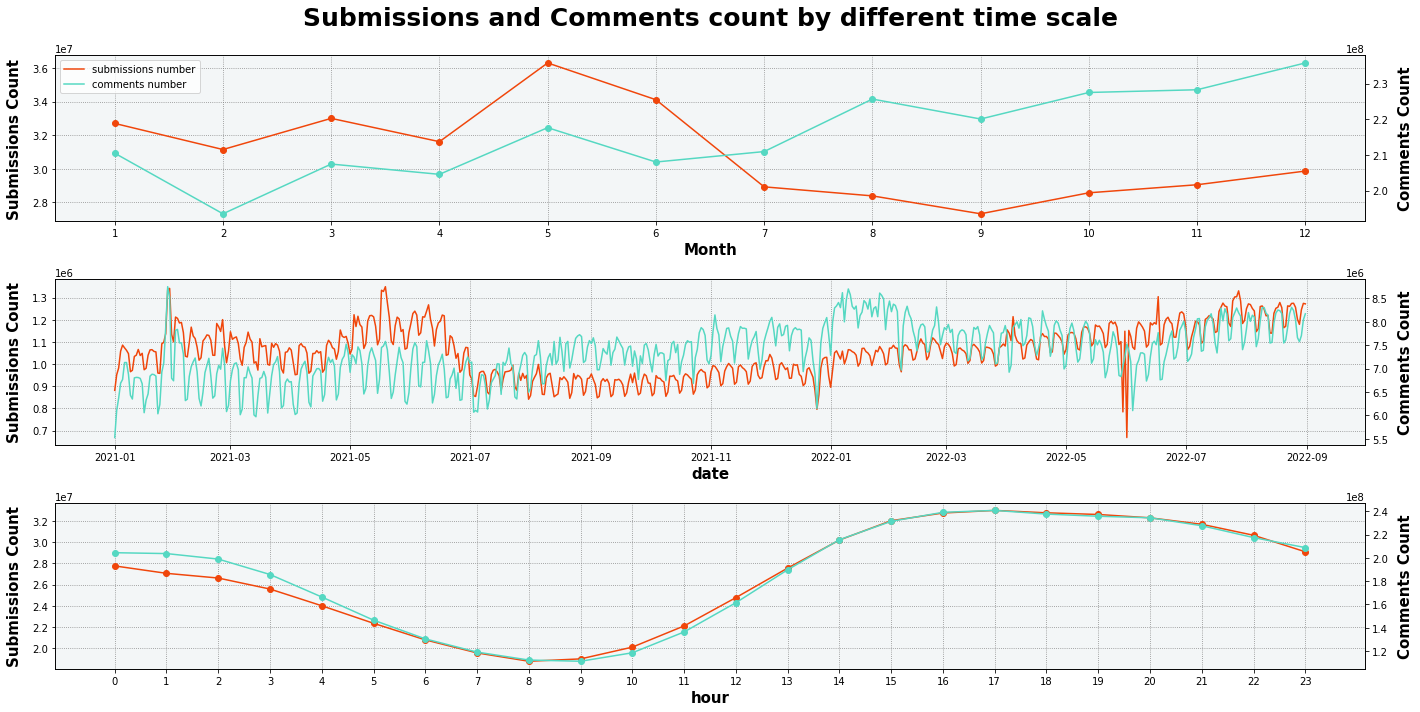

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]

# month
ax1 = plt.subplot(311)
ax1.set_facecolor('#f3f6f7')
ax1.grid(True,linestyle=':',color='gray')
line1, =ax1.plot("month", "count", '-', data = submissions_by_month, color = "#f0460b",label='submissions number')
ax1.plot("month", "count", 'o', data = submissions_by_month, color = "#f0460b")
ax2 = ax1.twinx()
line2, =ax2.plot("month", "count", '-', data = comments_by_month, color = "#55d8c2",label='comments number')
ax2.plot("month", "count", 'o', data = comments_by_month, color = "#55d8c2")
ax1.set_xlabel("Month",fontsize = 15,fontweight='bold')
ax1.set_ylabel("Submissions Count",fontsize = 15,fontweight='bold',labelpad=10)
ax2.set_ylabel("Comments Count",fontsize = 15,fontweight='bold',labelpad=10)
ax1.set_xticks(range(1,13,1))
ax1.legend(handles=[line1, line2],loc=2)
ax1.set_title("Submissions and Comments count by different time scale",fontsize = 25, fontweight='bold',pad=30)

# date
ax3 = plt.subplot(312)
ax3.set_facecolor('#f3f6f7')
ax3.grid(True,linestyle=':',color='gray')
line3, =ax3.plot("date", "count", '-', data = submissions_by_date, color = "#f0460b",label='submissions number')
ax4 = ax3.twinx()
line4, =ax4.plot("date", "count", '-', data = comments_by_date, color = "#55d8c2",label='comments number')
ax3.set_xlabel("date",fontsize = 15,fontweight='bold')
ax3.set_ylabel("Submissions Count",fontsize = 15,fontweight='bold',labelpad=10)
ax4.set_ylabel("Comments Count",fontsize = 15,fontweight='bold',labelpad=10)
ax1.legend(handles=[line3, line4],loc=2)

# hour
ax5 = plt.subplot(313)
ax5.set_facecolor('#f3f6f7')
ax5.grid(True,linestyle=':',color='gray')
line5, =ax5.plot("hour", "count", '-', data = submissions_by_hour, color = "#f0460b",label='submissions number')
ax5.plot("hour", "count", 'o', data = submissions_by_hour, color = "#f0460b")
ax6 = ax5.twinx()
line6, =ax6.plot("hour", "count", '-', data = comments_by_hour, color = "#55d8c2",label='comments number')
ax6.plot("hour", "count", 'o', data = comments_by_hour, color = "#55d8c2")
ax5.set_xlabel("hour",fontsize = 15,fontweight='bold')
ax5.set_ylabel("Submissions Count",fontsize = 15,fontweight='bold',labelpad=10)
ax6.set_ylabel("Comments Count",fontsize = 15,fontweight='bold',labelpad=10)
ax5.set_xticks(range(24))
ax1.legend(handles=[line5, line6],loc=2)
plt.tight_layout()

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'submissions and comments count by different time scale.png')
plt.savefig(plot_fpath)
plt.show()

This plot shows how reddit submission and comment count change from 2021-01-01 to 2022-8-31 on different time scale. First, the chnages of submission count and comment are not totally match each other.For example, from June to September, submisison count gradually decreases, but comment count gradually increase. Meanwhile, May is the most active month within a year for reddit. Second, within a day, the fluctuations of submission and comment count look like very similar, gradually decrease from 18:00 to the next day 08:00, and gradually increase from 08:00 to 17:00. Moreover, daily submission and comment count show a certain pattern fluctuation, which might caused by weekday and weekend.

In [0]:
# day of week
submissions_by_dayofweek = dfs.groupBy("day_of_week").count().orderBy(col("day_of_week"), ascending=True).collect()
comments_by_dayofweek = dfc.groupBy("day_of_week").count().orderBy(col("day_of_week"), ascending=True).collect()
submissions_by_dayofweek = spark.createDataFrame(submissions_by_dayofweek).toPandas()
comments_by_dayofweek = spark.createDataFrame(comments_by_dayofweek).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "submissions_by_dayofweek.csv")
submissions_by_dayofweek.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_by_dayofweek.csv")
comments_by_dayofweek.to_csv(fpath)

In [0]:
submissions_18=spark.read.parquet('dbfs:/FileStore/submissions_18.parquet')
submissions_not18=spark.read.parquet('dbfs:/FileStore/submissions_not18.parquet')

In [0]:
# submission over 18 or not
submissions_by_dayofweek_18 = submissions_18.groupBy("day_of_week").count().orderBy(col("day_of_week"), ascending=True).collect()
submissions_by_dayofweek_not18 = submissions_not18.groupBy("day_of_week").count().orderBy(col("day_of_week"), ascending=True).collect()
submissions_by_dayofweek_18 = spark.createDataFrame(submissions_by_dayofweek_18).toPandas()
submissions_by_dayofweek_not18 = spark.createDataFrame(submissions_by_dayofweek_not18).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "submissions_by_dayofweek_18.csv")
submissions_by_dayofweek_18.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_by_dayofweek_not18.csv")
submissions_by_dayofweek_not18.to_csv(fpath)

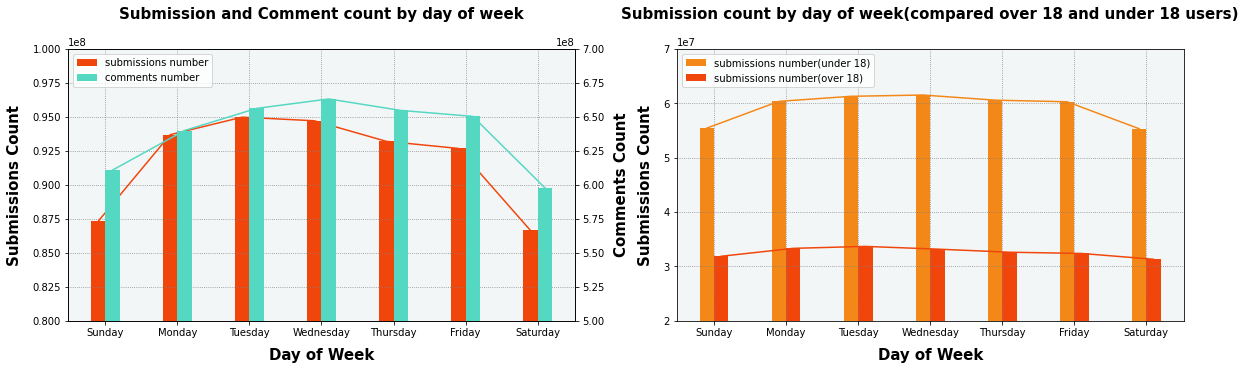

In [0]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 5]
ax1 = plt.subplot(121)
ax1.set_facecolor('#f3f6f7')
ax1.grid(True,linestyle=':',color='gray')
bar1=ax1.bar([0, 1, 2, 3, 4, 5, 6], submissions_by_dayofweek["count"], width =0.2,color = "#f0460b",label='submissions number')
ax1.plot([0, 1, 2, 3, 4, 5, 6], submissions_by_dayofweek["count"], '-',color = "#f0460b")
ax2 = ax1.twinx()
bar2 = ax2.bar([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], comments_by_dayofweek["count"],width =0.2, color = "#55d8c2",label='comments number')
ax2.plot([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], comments_by_dayofweek["count"],'-', color = "#55d8c2")
ax1.set_xlabel("Day of Week",fontsize = 15,fontweight='bold',labelpad=10)
ax1.set_ylabel("Submissions Count",fontsize = 15,fontweight='bold',labelpad=10)
ax2.set_ylabel("Comments Count",fontsize = 15,fontweight='bold',labelpad=10)
ax1.set_ylim(80000000,100000000)
ax2.set_ylim(500000000,700000000)
ax1.legend(handles=[bar1, bar2],loc=2)
ax1.set_xticks([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1])
ax1.set_xticklabels(["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax1.set_title("Submission and Comment count by day of week",fontsize = 15, fontweight='bold',pad=30)


ax3=plt.subplot(122)
ax3.set_facecolor('#f3f6f7')
ax3.grid(True,linestyle=':',color='gray')
ax3.bar([0, 1, 2, 3, 4, 5, 6], submissions_by_dayofweek_not18["count"], width =0.2,color = "#f38818",label='submissions number(under 18)')
ax3.plot([0, 1, 2, 3, 4, 5, 6], submissions_by_dayofweek_not18["count"], '-',color = "#f38818")
ax3.bar([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], submissions_by_dayofweek_18["count"],width =0.2, color = "#f0460b",label='submissions number(over 18)')
ax3.plot([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], submissions_by_dayofweek_18["count"],'-', color = "#f0460b")
ax3.set_xlabel("Day of Week",fontsize = 15,fontweight='bold',labelpad=10)
ax3.set_ylabel("Submissions Count",fontsize = 15,fontweight='bold',labelpad=10)
ax3.legend(loc=2)
ax3.set_ylim(20000000,70000000)
ax3.set_xticks([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1])
ax3.set_xticklabels(["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax3.set_title("Submission count by day of week(compared over 18 and under 18 users)",fontsize = 15, fontweight='bold',pad=30)

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'submissions and comments count by day of week.png')
plt.savefig(plot_fpath)
plt.show()

From the left figure, we could observe that posts of both submissions and comments type are made most often during weekdays and less often on weekends, which seems reasonable since people might enjoy their casual time during the weekends and have no need to browse the forums on their phone which only utilizes scattered pieces of time.<br>
From the right figure, we could also observe that for submission posts, teenager authors make way more posts than adult authors, while their posting behavior seems to define the pattern illustrated by the left figure, making the most posts on weekdays.

### Explore wallstreetbets subredit count and stock market index

#### Data Perperation for Plot

In [0]:
##### wallstreetbets subreddit and stock index

In [0]:
submissions_wallstreetbets = dfs.filter(col('subreddit') == 'wallstreetbets').cache()
comments_wallstreetbets = dfc.filter(col('subreddit') == 'wallstreetbets').cache()
print('wallstreetbets subreddit submission count:', submissions_wallstreetbets.count())
print('wallstreetbets subreddit comments count:',comments_wallstreetbets.count())

wallstreetbets subreddit submission count: 1585804
wallstreetbets subreddit comments count: 40309654


In [0]:
# save to DBFS
submissions_wallstreetbets.write.mode('Overwrite').parquet('dbfs:/FileStore/submissions_wallstreetbets.parquet')
comments_wallstreetbets.write.mode('Overwrite').parquet('dbfs:/FileStore/comments_wallstreetbets.parquet')

In [0]:
# group by date
sub_wallstreetbets_by_date = submissions_wallstreetbets.groupBy("date").count().orderBy(col("date"), ascending=True).collect()
com_wallstreetbets_by_date = comments_wallstreetbets.groupBy("date").count().orderBy(col("date"), ascending=True).collect()
sub_wallstreetbets_by_date = spark.createDataFrame(sub_wallstreetbets_by_date).toPandas()
com_wallstreetbets_by_date = spark.createDataFrame(com_wallstreetbets_by_date).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "submissions_wallstreetbets_by_date.csv")
sub_wallstreetbets_by_date.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "comments_wallstreetbets_by_date.csv")
com_wallstreetbets_by_date.to_csv(fpath)

#### External Data Overview

In [0]:
# import stock market index data
# external dataset contains each day index of S&P 500, Nasdap and Dow Jones from 2021-01-01 to 2022-08-31
# the missing value of stock market closed day is filled by valid data the day before
stock_index = pd.read_csv('/Workspace/Repos/Project/fall-2022-project-eda-adb-project-group-21/stock_index.csv')
stock_index

,Unnamed: 0,date,sp500,nasdaq,dj
0,1,2021-01-01,3756.070068,12888.280273,30606.480469
1,2,2021-01-02,3756.070068,12888.280273,30606.480469
2,3,2021-01-03,3756.070068,12888.280273,30606.480469
3,4,2021-01-04,3700.649902,12698.450195,30223.890625
4,5,2021-01-05,3726.860107,12818.959961,30391.599609
...,...,...,...,...,...
603,604,2022-08-27,4057.659912,12141.709961,32283.400391
604,605,2022-08-28,4057.659912,12141.709961,32283.400391
605,606,2022-08-29,4030.610107,12017.669922,32098.990234
606,607,2022-08-30,3986.159912,11883.139648,31790.869141


In [0]:
# merge submission count, comment count and stock market index together
stock_data = pd.concat([com_wallstreetbets_by_date['date'],com_wallstreetbets_by_date['count'],sub_wallstreetbets_by_date['count'],stock_index['sp500'],stock_index['nasdaq'],stock_index['dj']],axis = 1) 
stock_data.columns=['date','comment_count','submission_count','sp500','nasdaq','dj']

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "stock_data.csv")
stock_data.to_csv(fpath)
# this table shows how the submission number,comment number and stock market index change from 2021-01-01 to 2022-08-31
stock_data

,date,comment_count,submission_count,sp500,nasdaq,dj
0,2021-01-01,27996,592,3756.070068,12888.280273,30606.480469
1,2021-01-02,29582,626,3756.070068,12888.280273,30606.480469
2,2021-01-03,29795,613,3756.070068,12888.280273,30606.480469
3,2021-01-04,59719,1032,3700.649902,12698.450195,30223.890625
4,2021-01-05,55138,965,3726.860107,12818.959961,30391.599609
...,...,...,...,...,...,...
603,2022-08-27,28664,606,4057.659912,12141.709961,32283.400391
604,2022-08-28,27166,539,4057.659912,12141.709961,32283.400391
605,2022-08-29,49729,1139,4030.610107,12017.669922,32098.990234
606,2022-08-30,52706,1268,3986.159912,11883.139648,31790.869141


#### Plot and Insight

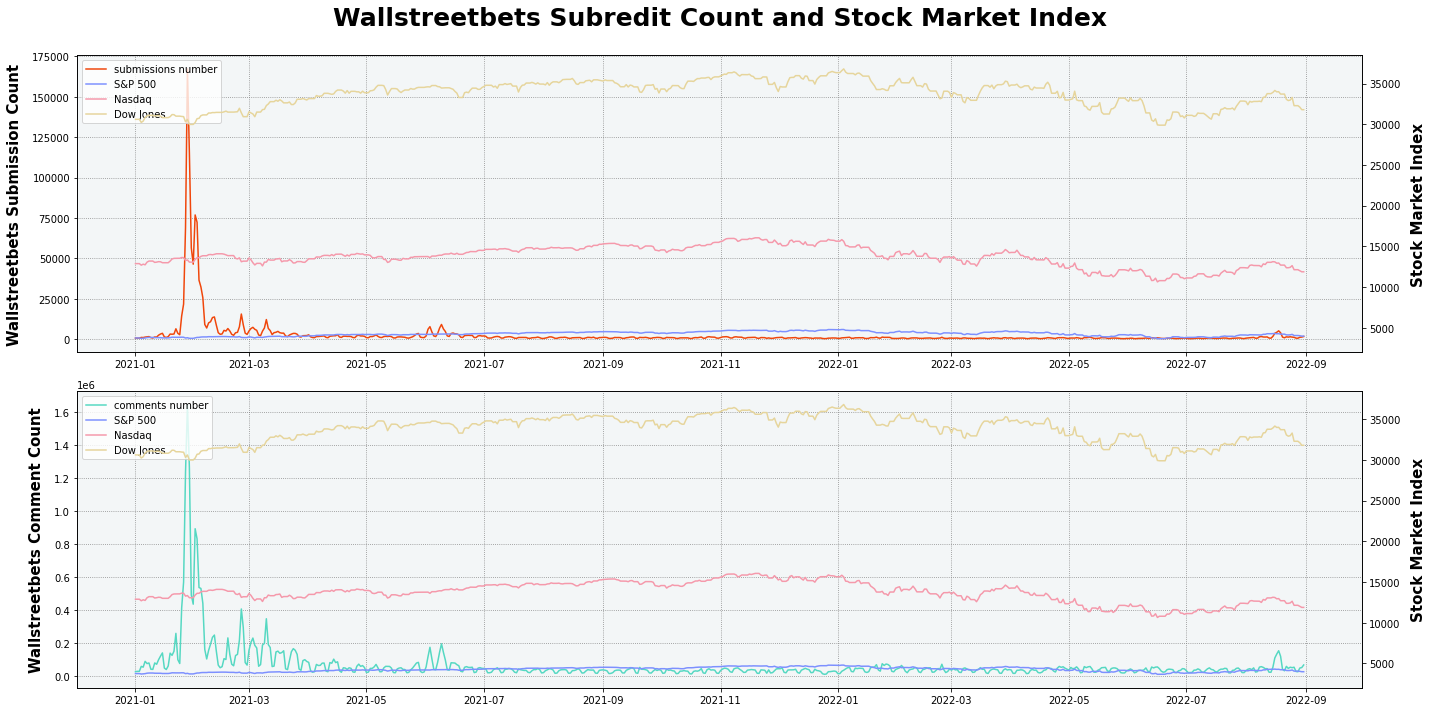

In [0]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]

# submission
ax1 = plt.subplot(211)
ax1.set_facecolor('#f3f6f7')
ax1.grid(True,linestyle=':',color='gray')
line1, =ax1.plot("date", "submission_count", '-', data = stock_data, color = "#f0460b",label='submissions number')
ax2 = ax1.twinx()
line2, =ax2.plot("date", "sp500", '-', data = stock_data, color = "#7d90ff",label='S&P 500')
line3, =ax2.plot("date", "nasdaq", '-', data = stock_data, color = "#f599ab",label='Nasdaq')
line4, =ax2.plot("date", "dj", '-', data = stock_data, color = "#e6d59c",label='Dow Jones')
ax1.set_ylabel("Wallstreetbets Submission Count",fontsize = 15,fontweight='bold',labelpad=10)
ax2.set_ylabel("Stock Market Index",fontsize = 15,fontweight='bold',labelpad=10)
ax1.legend(handles=[line1, line2,line3,line4],loc=2)
ax1.set_title("Wallstreetbets Subredit Count and Stock Market Index",fontsize = 25, fontweight='bold',pad=30)

# comment
ax3 = plt.subplot(212)
ax3.set_facecolor('#f3f6f7')
ax3.grid(True,linestyle=':',color='gray')
line5, =ax3.plot("date", "comment_count", '-', data = stock_data, color = "#55d8c2",label='comments number')
ax4 = ax3.twinx()
line6, =ax4.plot("date", "sp500", '-', data = stock_data, color = "#7d90ff",label='S&P 500')
line7, =ax4.plot("date", "nasdaq", '-', data = stock_data, color = "#f599ab",label='Nasdaq')
line8, =ax4.plot("date", "dj", '-', data = stock_data, color = "#e6d59c",label='Dow Jones')
ax3.set_ylabel("Wallstreetbets Comment Count",fontsize = 15,fontweight='bold',labelpad=10)
ax4.set_ylabel("Stock Market Index",fontsize = 15,fontweight='bold',labelpad=10)
ax3.legend(handles=[line5, line6,line7,line8],loc=2)
plt.tight_layout()

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'wallstreetbets subredit and stock market Index.png')
plt.savefig(plot_fpath)
plt.show()

In [0]:
# AutoNewspaper subreddit
comments_AutoNewspaper = dfc.filter(col('subreddit') == 'AutoNewspaper').cache()
print('AutoNewspaper subreddit comments count:',comments_AutoNewspaper.count())

AutoNewspaper subreddit comments count: 28524


In [0]:
# save to DBFS
comments_AutoNewspaper.write.mode('Overwrite').parquet('dbfs:/FileStore/comments_AutoNewspaper.parquet')

From the figure, we could observe the change in the stock index and the number of comments and submissions.:<br>
1. There is no significant relationship between stock index and the number of comment and submission. <br>
2. We will use sentiment analysis techniques in a follow-up study to examine the relationship between the content of comments and submissions and stock price data.

### Explore the change of buzzwords about covid-19 from 2021 to 2022

#### Data Perperation for Plot

#### Regex searches for specific keywords about covid and produce dummy variables

In [0]:
df_a = comments_AutoNewspaper.withColumn('covid_topic', col('body').rlike('(?i)covid|(?i)coronavirus|(?i)vaccine|(?i)pandemic|(?i)mask|(?i)quarantine|(?i)restriction')) \
.withColumn('year',year(from_unixtime(col('created_utc'))))

In [0]:
df_a.groupby('year','covid_topic').count().show()

+----+-----------+-----+
|year|covid_topic|count|
+----+-----------+-----+
|2021|      false|15409|
|2022|      false|11535|
|2021|       true| 1072|
|2022|       true|  508|
+----+-----------+-----+



#### Insight from the table
This table shows the comment number whether related to covid-19 topic. This dataset contains the entire 2021 data and 8 months 2022 data. Compare the ratio of related and unrelated comments number, AutoNewspaper subreddit pays less attention on Covid-19 in 2022 compared with 2021.

In [0]:
# 2021 and 2022
df_a_2021 = df_a.filter((col('year') == 2021) & (col('covid_topic') == True)).select('body','year').collect()
df_a_2022 = df_a.filter((col('year') == 2022) & (col('covid_topic') == True)).select('body','year').collect()
AutoNewspaper_body_2021 = spark.createDataFrame(df_a_2021).toPandas()
AutoNewspaper_body_2022 = spark.createDataFrame(df_a_2022).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "AutoNewspaper_body_2021.csv")
AutoNewspaper_body_2021.to_csv(fpath)
fpath = os.path.join(CSV_DIR, "AutoNewspaper_body_2022.csv")
AutoNewspaper_body_2022.to_csv(fpath)

In [0]:
# generate entire text for wordcloud
lst_2021 = list(AutoNewspaper_body_2021['body'])
text_2021 = " ".join(lst_2021)
lst_2022 = list(AutoNewspaper_body_2021['body'])
text_2022 = " ".join(lst_2022)

#### Plot and Insight

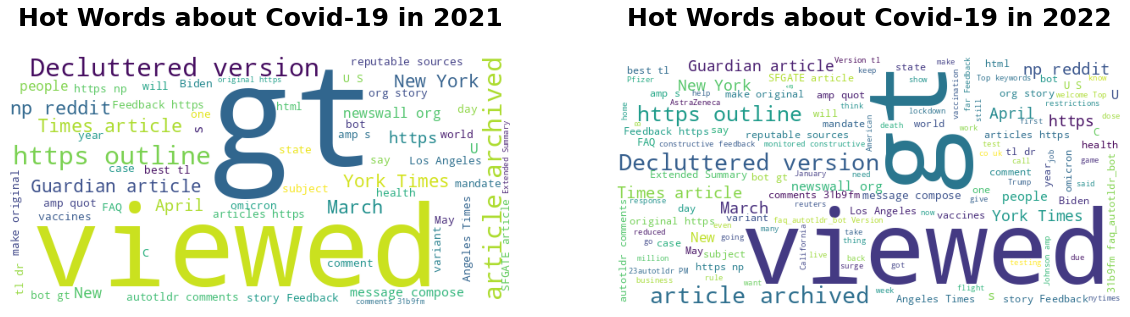

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

reg_word =['covid','coronavirus','vaccine','pandemic','mask','quarantine','restriction']
wordcloud_2021 = WordCloud(background_color='white',scale=1.5, stopwords = list(STOPWORDS)+reg_word,min_font_size = 6).generate(text_2021)
wordcloud_2022 = WordCloud(background_color='white',scale=1.5, stopwords = list(STOPWORDS)+reg_word,min_font_size = 6).generate(text_2022)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(wordcloud_2021)
plt.axis('off')
plt.title('Hot Words about Covid-19 in 2021',fontsize = 25, fontweight='bold',pad=30)
plt.subplot(122)
plt.imshow(wordcloud_2022)
plt.axis('off')
plt.title('Hot Words about Covid-19 in 2022',fontsize = 25, fontweight='bold',pad=30)
plt.show()

This is a rather raw wordcloud about covid-related posts, since the main words "gt" and "viewed" are repeated without an explicit connection to the covid topic.<br>
However, the fact that the wordclouds look similar still provides some potential assumptions about the attitudes of Reddit users against covid. What if they have been bored enough to change their attitudes? Further explorations could be performed by NLP to further compare the sentiment difference between 2021 and 2022.

### Explore the 10 most controversial subreddits having more than 10000 comments

#### Data Perperation for Plot

In [0]:
# turn boolean value to 0/1 
# author_cakeday, can_gild, is_submitter, stickied
dfc_full=comments.withColumn('author_cakeday',when(comments.author_cakeday == False,0)
                  .when(comments.author_cakeday == True,1))\
.withColumn('can_gild',when(comments.can_gild == False,0)
                  .when(comments.can_gild == True,1))\
.withColumn('is_submitter',when(comments.is_submitter == False,0)
                  .when(comments.is_submitter == True,1))\
.withColumn('stickied',when(comments.stickied == False,0)
                  .when(comments.stickied == True,1))
print("Boolean values transformed")
dfc_full=dfc_full.drop('author_cakeday','author_flair_css_class','author_flair_text','distinguished','retrieved_on')
print("Columns dropped")

# generate new variables
# generate month column, the day of the week column and the author account is deleted or not
dfc_full =dfc_full.withColumn('day_of_week', dayofweek(from_unixtime(col('created_utc')))) \
.withColumn('month',month(from_unixtime(col('created_utc')))) \
.withColumn('hour', hour(from_unixtime(col('created_utc')))) \
.withColumn('account_deleted', when(col('author') == '[deleted]',1).otherwise(0)).cache()
print("Variables created")
dfc_full.write.parquet("FileStore/dfc_full.parquet")

In [0]:
import pandas as pd

contro_ten = ["WI_Neutral", "MakingaMurderer", "stonedswifties", "Syracuse_comments", "syriancivilwar", "moderatepolitics", "Ethiopia", "media_criticism", "OntarioCanada", "blndsundoll4mj"]
contro_sub_count = []
contro_com_count = []
sub_count = pd.read_csv("data/csv/subreddits_count_by_submissions.csv")
comment_count = pd.read_csv("data/csv/subreddits_count_by_comments.csv")

Here we are to extract the 10 most controversial subreddits, but the whole data statistics for all subreddits are way too large to store, so we just picked out the 10 subreddits from our old-version figures, computed their controversiality level and made a new graph as well as the summary table below:

In [0]:
dfc_full = spark.read.parquet("/FileStore/dfc_full.parquet")
#dfc_big_subs = dfc_full.groupBy("subreddit").count()
#dfc_contro = dfc.where(dfc_full["subreddit"].isin(list(dfc_big_subs.toPandas()["subreddit"]))).groupBy("subreddit").agg({"controversiality":"avg", "body":"count"})
dfc_contro = dfc_full.where(dfc_full["subreddit"].isin(contro_ten)).groupBy("subreddit").agg({"controversiality":"avg", "body":"count"})
dfc_contro_10 = dfc_contro.sort(dfc_contro["avg(controversiality)"], ascending=False).toPandas()
dfc_contro_10 = dfc_contro_10[:10]
dfc_contro_10.head(10)

,subreddit,avg(controversiality),count(body)
0,WI_Neutral,0.276506,10224
1,MakingaMurderer,0.171839,168140
2,stonedswifties,0.168616,13848
3,Syracuse_comments,0.165261,89271
4,syriancivilwar,0.154962,80252
5,moderatepolitics,0.145255,1115651
6,Ethiopia,0.139696,102000
7,media_criticism,0.136214,43307
8,OntarioCanada,0.134576,582875
9,blndsundoll4mj,0.130279,102680


In [0]:
for subreddit in contro_ten:
    contro_sub_count.append(sub_count.loc[sub_count['subreddit'] == subreddit, 'count'].iloc[0])
    contro_com_count.append(comment_count.loc[comment_count['subreddit'] == subreddit, 'count'].iloc[0])
contro_bubble = pd.DataFrame(list(zip(contro_ten, contro_sub_count, contro_com_count, list(dfc_contro_10["avg(controversiality)"]))),
               columns =['subreddit', 'sub', 'com', 'contro'])
contro_bubble

,subreddit,sub,com,contro
0,WI_Neutral,1525,10224,0.276506
1,MakingaMurderer,3111,168140,0.171839
2,stonedswifties,1260,13848,0.168616
3,Syracuse_comments,4272,89271,0.165261
4,syriancivilwar,8397,80252,0.154962
5,moderatepolitics,9172,1115651,0.145255
6,Ethiopia,10930,102000,0.139696
7,media_criticism,2373,43307,0.136214
8,OntarioCanada,14827,582875,0.134576
9,blndsundoll4mj,6885,102680,0.130279


#### Plot and Insight

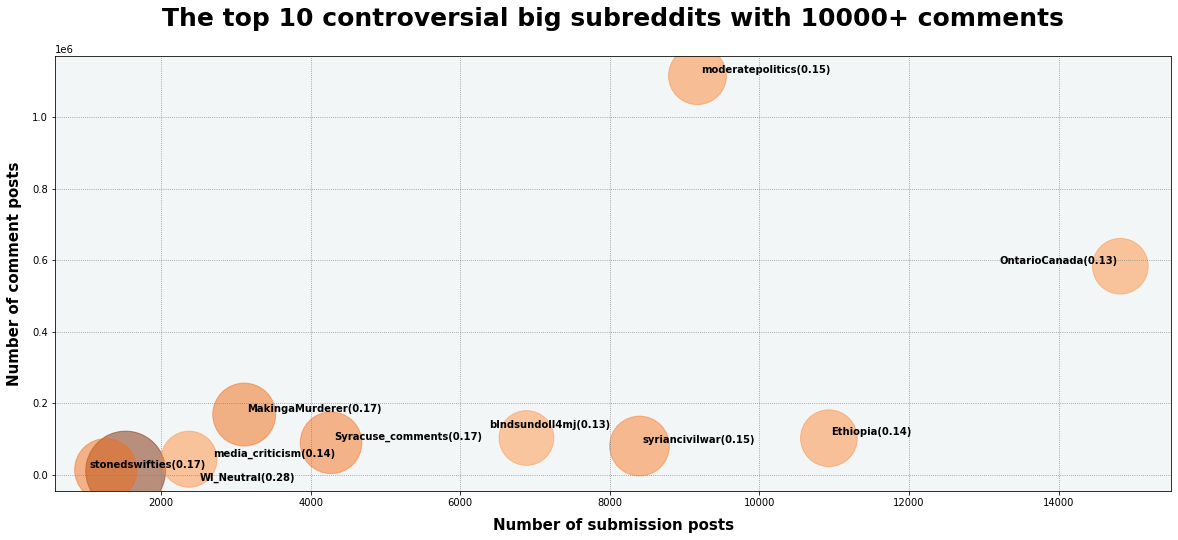

In [0]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['axes.facecolor']='#f3f6f7'
plt.figure()
plt.grid(True,linestyle=':',color='gray')
my_cmap = plt.get_cmap("Oranges")
plt.scatter(contro_bubble["sub"], contro_bubble["com"], s=contro_bubble["contro"]/contro_bubble["contro"][9]*3000,
            color=my_cmap(contro_bubble["contro"]/contro_bubble["contro"][0]), alpha=0.5)
plt.xlabel("Number of submission posts",fontsize = 15,fontweight='bold',labelpad=10)
plt.ylabel("Number of comment posts",fontsize = 15,fontweight='bold',labelpad=10)
plt.title("The top 10 controversial big subreddits with 10000+ comments",fontsize = 25, fontweight='bold',pad=30)
#For each point, we add a text inside the bubble
texts = [plt.text(contro_bubble["sub"][line],
                  contro_bubble["com"][line], 
                  contro_bubble["subreddit"][line]+"("+str(np.round(contro_bubble["contro"][line],2))+")", 
                  size='medium', color='black', weight='semibold') for line in range(10)]
adjust_text(texts)
plot_fpath = os.path.join(PLOT_DIR, 'controversiality.png')
plt.savefig(plot_fpath)
plt.show()

From this figure, we could see that: <br>
1. Popular culture (stonedswifties, media_criticism, MakingaMurderer, blndsundoll4mj), regional forum(WI_Neutral, Syracuse_comments, Ethiopia, OntatioCanada) and Politics&War(syriancivilwar, moderatepolitics) are the most controversial topics. <br>
2. WI_Neutral serves as the most controversial big subreddit with 10000+ comments, with 28% of its comments tagged as controversial, which is possibly due to the elections happening.

### Explore the relationship between subreddit size and average user activities

As presence of auto-reply bots in the comments, we decide to use submissions to account for user activities in subreddits.

#### Data Perperation for Plot

In [0]:
sub_avg = dfs.groupBy("subreddit").agg(countDistinct("author"),count("title"))
sub_avg.show()

+-------------------+-------------+------------+
|          subreddit|count(author)|count(title)|
+-------------------+-------------+------------+
|          Latinabbw|         3925|       40745|
|     TrueOffMyChest|       121260|      353508|
|       u_CyberCisin|            2|          49|
|      Fotos_Espanol|           60|         271|
|             Azarov|            2|          31|
|         linuxmemes|         5840|       17173|
|       RedGIFsEbony|          196|         982|
|        creepypasta|         8004|       25494|
|      u_LBA_Dres_ag|            1|           1|
|    PatchesEmporium|        22199|      121173|
|              anime|       109262|      324474|
|        Silverstein|          196|         284|
|PmPicsCUSyouAskedme|            7|           8|
|            GayZoom|         7306|      107240|
|       u_flatfilers|            1|        1362|
|        angrydragon|         2410|        2938|
|             travel|        66409|      130073|
|      gastricsleeve

In [0]:
sub_avg_act = sub_avg.withColumn("avg_act", sub_avg["count(title)"]/sub_avg["count(author)"]).toPandas()
sub_avg_act.head()

,subreddit,count(author),count(title),avg_act
0,sextips,3086,6267,2.030784
1,TrueOffMyChest,121260,353508,2.915289
2,GayZoom,7306,107240,14.678347
3,bookshelf,5151,9312,1.807804
4,anime,109262,324474,2.969688


In [0]:
sub_avg_act[sub_avg_act["avg_act"]>100000]

,subreddit,count(author),count(title),avg_act
3785555,FreshNewsToday,1,104274,1.042740e+05
2649283,TORONTOSTARauto,1,108566,1.085660e+05
4963125,FOXauto,1,113842,1.138420e+05
4806731,ACNH_Twitter_Designs,1,130996,1.309960e+05
3754883,u_gilnarPlanet,1,133050,1.330500e+05
4921516,shittyjobsforrobots,1,139801,1.398010e+05
2059223,ToR_Archive,1,146479,1.464790e+05
3342124,TheNewsFeed,1,151334,1.513340e+05
4894839,liveadultcamsnow,1,151613,1.516130e+05
2862872,u_celebnationofficial,1,186487,1.864870e+05


#### Plot and Insight

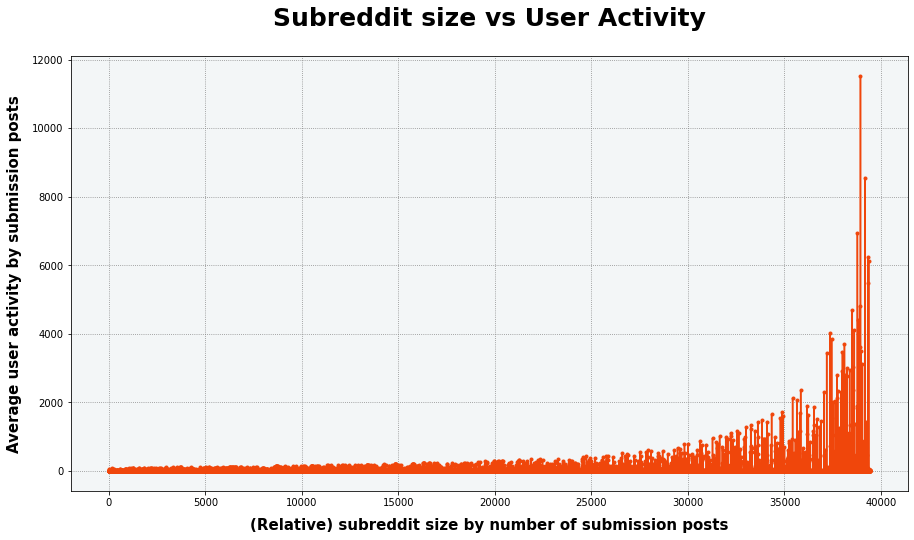

In [0]:
sub_avg_act = sub_avg_act.sort_values(by='count(title)')
sub_avg_act_big_enough = sub_avg_act[sub_avg_act["count(author)"] > 10]
sub_avg_act_big_enough = sub_avg_act_big_enough[sub_avg_act_big_enough["count(title)"] > 1000]

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['axes.facecolor']='#f3f6f7'
plt.figure()
plt.grid(True,linestyle=':',color='gray')
plt.plot(range(len(sub_avg_act_big_enough)), sub_avg_act_big_enough["avg_act"], marker='.',color= "#f0460b")
plt.xlabel("(Relative) subreddit size by number of submission posts",fontsize = 15,fontweight='bold',labelpad=10)
plt.ylabel("Average user activity by submission posts",fontsize = 15,fontweight='bold',labelpad=10)
plt.title("Subreddit size vs User Activity",fontsize = 25, fontweight='bold',pad=30)

plot_fpath = os.path.join(PLOT_DIR, 'average_activity.png')
plt.savefig(plot_fpath)
plt.show()

This figure displays the relative size of subreddits along with their average user activity defined by the average number of submission posts made by each of distinct authors in the subreddit.<br>
We could see a clear exponential shape of the figure, illustrating that users tend to be more active when situated in a larger web community, which seems reasonable since people usually want to grant sense of self-existence by receiving comments from others, which is definitely more easily when they express themselves in a larger community.

### Explore the top 10 video-posting subreddits for teenagers and adults

#### Data Perperation for Plot

In [0]:
sub_video = spark.read.parquet("/FileStore/submissions_new_column.parquet")
sub_video_teen = sub_video.filter(sub_video["is_video"] == 1).filter(sub_video["over_18"] == 0).cache()
sub_video_adult = sub_video.filter(sub_video["is_video"] == 1).filter(sub_video["over_18"] == 1).cache()

In [0]:
subreddit_video_teen = sub_video_teen.groupBy("subreddit").count()
subreddit_video_teen_top10 = subreddit_video_teen.sort(subreddit_video_teen["count"], ascending=False).toPandas()[:10]["subreddit"]
subreddit_video_adult = sub_video_adult.groupBy("subreddit").count()
subreddit_video_adult_top10 = subreddit_video_adult.sort(subreddit_video_adult["count"], ascending=False).toPandas()[:10]["subreddit"]
subreddit_video_top10 = pd.DataFrame(list(zip(subreddit_video_teen_top10, subreddit_video_adult_top10)), columns=["teen", "adult"])
fpath = os.path.join(CSV_DIR, "subreddits_video_top10.csv")
subreddit_video_top10.to_csv(fpath)

In [0]:
subreddit_video_top10

,teen,adult
0,ksi,KGBTR
1,shitposting,boypussy
2,apexlegends,tiktokthots
3,aww,FreeKarma4U
4,Unexpected,assaddicts1
5,funny,ebonyhomemade
6,nextfuckinglevel,shitposting
7,196,Unexpected
8,cats,lean
9,tiktokthots,The_ASSylum


#### Insight from the table
This table displays the top 10 subreddits where teenagers and adults post their videos.<br>
From this summary table, we could observe that while adult posters tend to use video for NSFW contents, teenagers usually use video posts for spreading memes, enjoying popular culture and sharing experiences.<br>
Besides, this table further supports one of our previous plots that suggests a difference in taste for teenagers and adults in Reddit.

#### Plot and Insight

In [0]:
sticked_gilded = df_a.groupby('stickied','gilded').count().collect()
sticked_gilded = spark.createDataFrame(sticked_gilded).toPandas()

## save the csv file in the csv dir
fpath = os.path.join(CSV_DIR, "sticked_gilded.csv")
sticked_gilded.to_csv(fpath)
sticked_gilded

,stickied,gilded,count
0,0,0,28514
1,1,0,9
2,0,1,1


#### Insight from the table
This table shows that whether there is any relationship between sticked comment and gilded comment in AutoNewspaper subreddit. In the table, nealy all of the comments are unsticked and ungilded, so these two features might not be an useful direction to explore in the further step. This might provide some reference for our business about advertising action in AutoNewspaper subreddit.

## Saving data to DBFS
Sometimes we may want to save intermediate data, especially if it is big and took a significant time to generate, in DBFS. The following code shows an example of this. We save submissions on the `memes` subreddit into dbfs so that we can read from it at a later stage.

In [0]:
submissions_filtered = submissions.filter(submissions.subreddit == "memes")

In [0]:
submissions_filtered.show()

In [0]:
# this code saves the data as a csv just for illustration, use parquet for faster analytics operations.
submissions_filtered.select("author_id", "title", "selftext").write.format('com.databricks.spark.csv').save("/FileStore/memes")

In [0]:
# # df.write.parquet("s3://wt254/parquet/news.parquet")
# # df.write.mode('overwrite').parquet("s3://wt254/parquet/news.parquet")
# # df_small.write.mode('overwrite').parquet("s3://wt254/parquet/news_small.parquet")

In [0]:
memes = spark.read.csv("/FileStore/memes")
memes.show()